In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# openCV 실습

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import os, sys, json, cv2

import matplotlib.pyplot as plt
import seaborn as sns

import urllib.request
import pandas as pd

from PIL import Image
from sklearn import datasets

In [ ]:
# 구글 코랩에서 cv2 이미지 출력을 위해선 다음을 꼭 실행해야 합니다.
from google.colab.patches import cv2_imshow

In [ ]:
corgi_img = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/data/웰시코기/웰시코기_비만/1 (1).jpg')
corgi_img

array([[[ 44,  70, 100],
        [ 43,  69,  99],
        [ 41,  67,  97],
        ...,
        [ 83,  94, 108],
        [ 87,  96, 109],
        [ 72,  80,  91]],

       [[ 42,  68,  98],
        [ 42,  68,  98],
        [ 41,  67,  97],
        ...,
        [ 79,  87, 104],
        [ 87,  94, 109],
        [ 72,  78,  91]],

       [[ 41,  67,  97],
        [ 41,  67,  97],
        [ 41,  67,  97],
        ...,
        [ 81,  87, 106],
        [ 88,  93, 111],
        [ 70,  74,  88]],

       ...,

       [[101, 123, 138],
        [100, 125, 140],
        [ 98, 124, 138],
        ...,
        [118, 151, 177],
        [116, 149, 175],
        [114, 147, 173]],

       [[ 90, 114, 128],
        [ 99, 124, 138],
        [ 97, 123, 137],
        ...,
        [112, 145, 171],
        [111, 144, 170],
        [110, 143, 169]],

       [[ 95, 118, 133],
        [ 96, 121, 135],
        [ 96, 121, 136],
        ...,
        [114, 147, 173],
        [114, 147, 173],
        [115, 148, 174]]

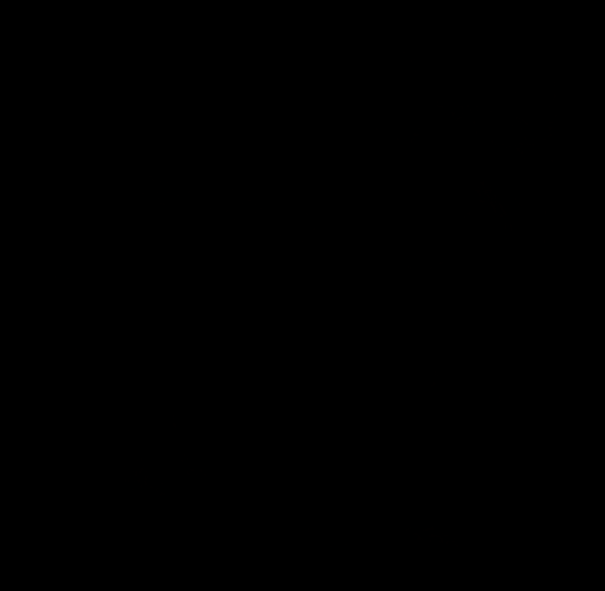

In [ ]:
corgi_img = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/data/웰시코기/웰시코기_비만/1 (1).jpg')
corgi_img = corgi_img/255
cv2_imshow(corgi_img)
# 0 ~ 1 사이 값을 갖기 때문에 검은 화면만 출력

In [ ]:
corgi_img.shape

(591, 605, 3)

## resize

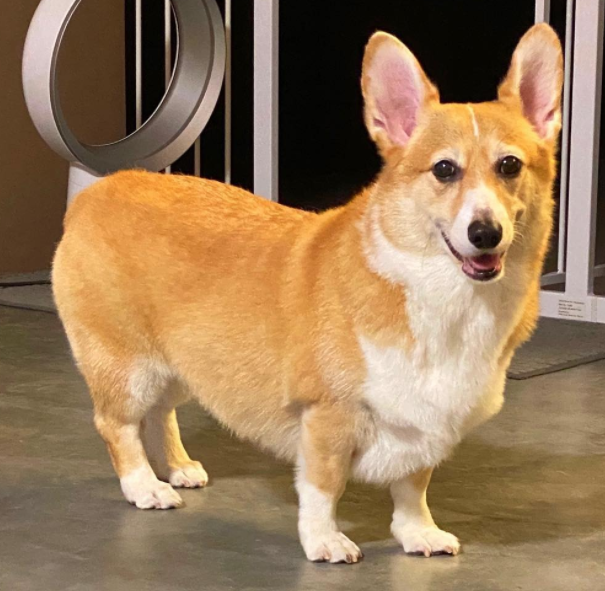

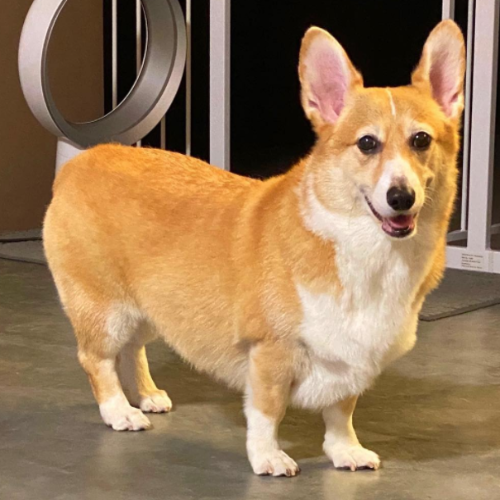

In [ ]:
from google.colab.patches import cv2_imshow
corgi_img = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/data/웰시코기/웰시코기_비만/1 (1).jpg')
dst = cv2.resize(corgi_img, dsize=(500,500))

cv2_imshow(corgi_img)
cv2_imshow(dst)

## resize & sharpening

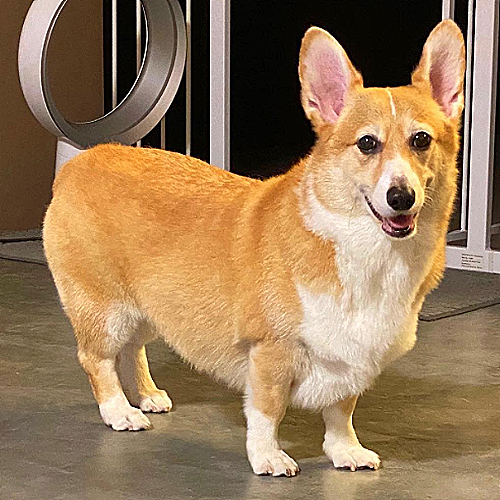

In [ ]:
image = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/data/웰시코기/웰시코기_비만/1 (1).jpg')
dst = cv2.resize(image, dsize=(500,500))
# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(dst, -1, kernel)

# 이미지 출력
cv2_imshow(image_sharp)

## edge set
- 엣지 추출
    - 경계선을 인지하는 것 엣지 추출(edge detection)이라고 한다. 
    - 엣지(경계선)는 이미지 안에서 픽셀의 값이 갑자기 변하는 곳이다. 
    - 따라서 엣지 추출을 하는 알고리즘은 이미지를 미분한 그레디언트(gradient) 벡터의 크기로 판단한다. 
    - 대표적인 엣지 추출 알고리즘으로 Sobel edge Detection과 Canny edge Detection이 있다.
- Laplacican
- Sobel X
- Sobel Y
- canny edge

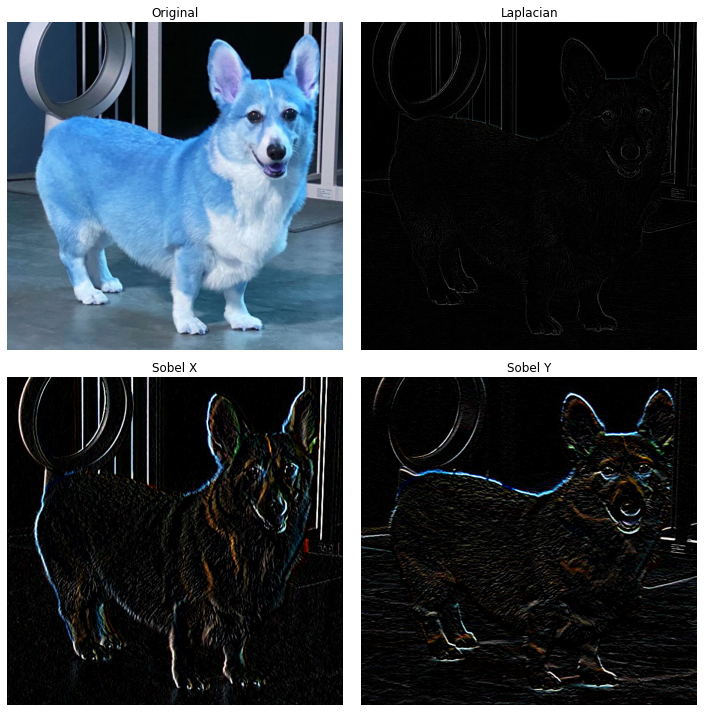

In [22]:
img = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/data/웰시코기/웰시코기_비만/1 (1).jpg')

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

# 웰시코기
- 학습용 이미지/웰시코기/웰시코기_set_3.zip 을 기준으로 실시

In [ ]:
# 각자에 맞는 경로로 수정
zip_path = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/웰시코기/웰시코기_set_3.zip'
# 현재 디렉토리 경로를 아래와 같이 지정해주어야 각 견종 폴더에 압축 해제
%cd '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/웰시코기'
# ! unzip '{zip_path}'

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/웰시코기'

# 학습 이미지 경로
nor_path = os.path.join(base_dir, '정상')
fat_path = os.path.join(base_dir, '비만')

nor_list = os.listdir(nor_path)
fat_list = os.listdir(fat_path)

In [ ]:
print(len(nor_list))
print(len(fat_list))

1051
346


## 전처리한 이미지를 저장할 폴더 생성

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1jUKAAmQZHvuqK8JiowWkvggYEh6efL-y/3조/Dog_Pic/학습할 이미지/웰시코기


In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기'

set_path = os.path.join(base_dir, 'set_5')  # 해당하는 이미지 세트 폴더 생성
# os.mkdir( set_path )
nor_path = os.path.join(set_path, '전처리_정상')
# os.mkdir( nor_path )
fat_path = os.path.join(set_path, '전처리_비만')
# os.mkdir( fat_path )

## 정상/비만 이미지 전처리
- https://ivo-lee.tistory.com/91
- https://kcy51156.tistory.com/55
- set_4와 다르게 set_5는 scaling을 진행해줍니다.
- scaling이 학습에 얼마나 영향을 미치는지 비교해봅니다.
- scaling은 0 ~ 255 값을 갖는 RGB색 정보를 0과 1사이의 값을 갖도록 해줍니다.
- 따라서 scaling을 거친 이미지는 검정색만 보일겁니다.
- 이미지 크기는 245x256을 자주 사용한다고 합니다.

### 정상 : sharpening

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/웰시코기'
for img in nor_list:
    # 기존 학습할 이미지 폴더의 정상 이미지들
    nor_path = os.path.join(base_dir, '정상')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(nor_path + '/' +img)
    # 이미지 크기 변경
    dst = cv2.resize(src, dsize = (500, 500))
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    img_sharp = cv2.filter2D(dst, -1, kernel)
    # sacling
    img_sharp = img_sharp / 255
    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5/전처리_정상/{i}.jpg', img_sharp)
    i += 1

### 비만 : sharpening

In [ ]:
i = 0
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/학습할 이미지/웰시코기'
for img in fat_list:
    # 기존 학습할 이미지 폴더의 비만 이미지들
    fat_path = os.path.join(base_dir, '비만')
    # 이미지 경로를 input, src에는 이미지의 numpy array 저장
    src = cv2.imread(fat_path + '/' +img)
    # 이미지 크기 변경
    dst = cv2.resize(src, dsize = (500, 500))
    # 이미지 전처리 : 선명하게
    # 커널을 만듭니다.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    img_sharp = cv2.filter2D(dst, -1, kernel)
    # sacling
    img_sharp = img_sharp / 255
    # 이미지 저장 (이미지 경로, 이미지 객체)
    cv2.imwrite( f'/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5/전처리_비만/{i}.jpg', img_sharp)
    i += 1

## train / validation / test 셋 분할
- 아래의 폴더 경로와 이름이 많이 헷갈립니다.
- 꼼꼼하게 확인해서 실행 시켜야 합니다.

In [ ]:
base_dir = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5'

# # 훈련셋, 검증셋, 테스트셋을 미리 분할하기 위한 폴더 경로
train_path = os.path.join(base_dir, 'train')
os.mkdir( train_path)

val_path = os.path.join(base_dir, 'validation')
os.mkdir( val_path)

test_path = os.path.join(base_dir, 'test')
os.mkdir( test_path)


# # train 정상 폴더
train_nor_path = os.path.join(train_path, 'nor')
os.mkdir( train_nor_path) # 폴더 생성

# # train 비만 폴더
train_fat_path = os.path.join(train_path, 'fat')
os.mkdir( train_fat_path)

# # validation 정상 폴더
val_nor_path = os.path.join(val_path, 'nor')
os.mkdir( val_nor_path)

# # validation 비만 폴더
val_fat_path = os.path.join(val_path, 'fat')
os.mkdir( val_fat_path)

# # test 정상 폴더
test_nor_path = os.path.join(test_path, 'nor')
os.mkdir( test_nor_path)

# # test 비만 폴더
test_fat_path = os.path.join(test_path, 'fat')
os.mkdir( test_fat_path)

In [ ]:
import shutil
# 여기서 nor_list와 fat_list는 전처리가 진행된 이미지를 의미합니다
nor_path = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5/전처리_정상'
nor_list = os.listdir(nor_path)
fat_path = '/content/drive/MyDrive/3조/Dog_Pic/전처리 이미지(학습용)/웰시코기/set_5/전처리_비만'
fat_list = os.listdir(fat_path)

In [ ]:
# train용 이미지 복사
for i in range(0, int(len(nor_list)*0.5)):
  src_path = os.path.join(nor_path, nor_list[i])                 # 원본 파일 경로
  dst_path = os.path.join(train_nor_path, f'nor_{i}.jpg')        # 복사할 파일 경로
  shutil.copyfile( src_path, dst_path )

for i in range(0, int(len(fat_list)*0.5)):
  src_path = os.path.join(fat_path, fat_list[i])        
  dst_path = os.path.join(train_fat_path, f'fat_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

# validation용 이미지 복사
for i in range(int(len(nor_list)*0.5), int(len(nor_list)*0.75)):
  src_path = os.path.join(nor_path, nor_list[i])        
  dst_path = os.path.join(val_nor_path, f'nor_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

for i in range(int(len(fat_list)*0.5), int(len(fat_list)*0.75)):
  src_path = os.path.join(fat_path, fat_list[i])        
  dst_path = os.path.join(val_fat_path, f'fat_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

# test용 이미지 복사
for i in range(int(len(nor_list)*0.75), len(nor_list)):
  src_path = os.path.join(nor_path, nor_list[i])        
  dst_path = os.path.join(test_nor_path, f'nor_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

for i in range(int(len(fat_list)*0.75), len(fat_list)):
  src_path = os.path.join(fat_path, fat_list[i])        
  dst_path = os.path.join(test_fat_path, f'fat_{i}.jpg')   
  shutil.copyfile( src_path, dst_path )

In [ ]:
# 잘 복사되었나 확인합니다.
print(f'train set : {len(os.listdir(train_nor_path)) + len(os.listdir(train_fat_path))}')
print(f'validation set : {len(os.listdir(val_nor_path)) + len(os.listdir(val_fat_path))}')
print(f'test set : {len(os.listdir(test_nor_path)) + len(os.listdir(test_fat_path))}')
print(f'total set : {len(nor_list) + len(fat_list)}')

train set : 698
validation set : 349
test set : 350
total set : 1397
